1444/1444 [==============================] - 2s 2ms/step
Acurácia: 0.63
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.03      0.51      0.06       617
           1       0.15      0.10      0.12      6085
           2       0.88      0.71      0.79     39494

    accuracy                           0.63     46196
   macro avg       0.35      0.44      0.32     46196
weighted avg       0.77      0.63      0.69     46196



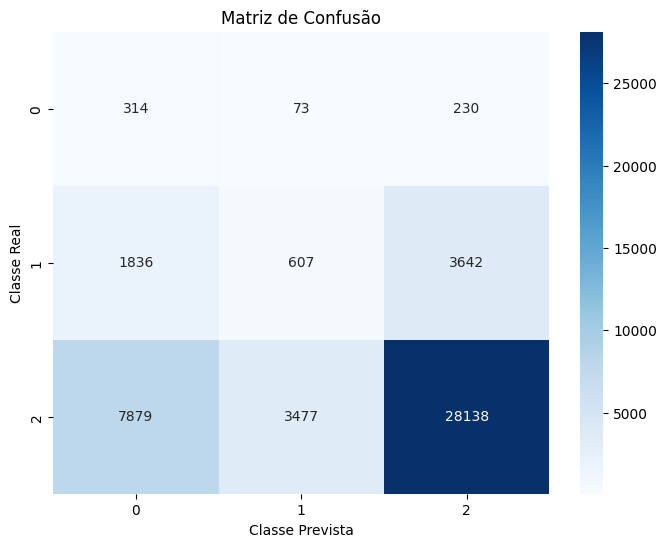

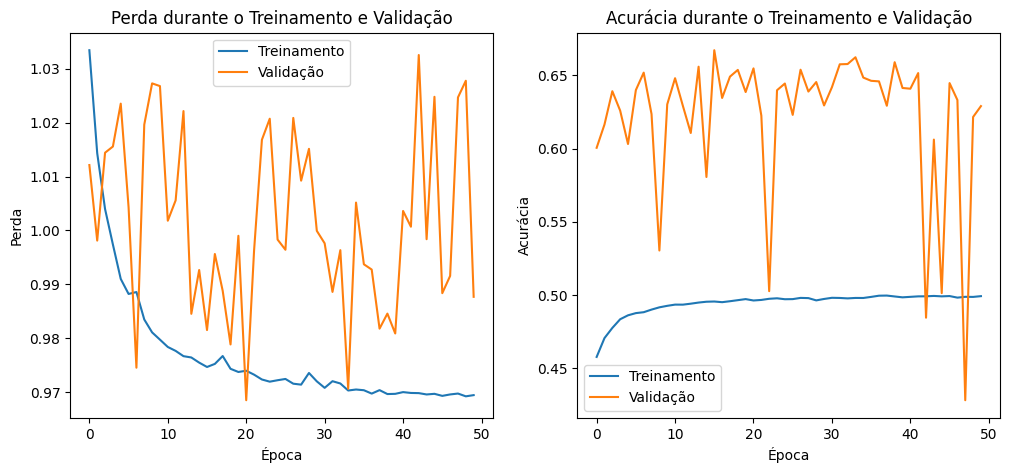

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder  # Adicionando a importação do LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Carregar os dados
df = pd.read_csv('car_accidentOFICIAL.csv')

# Selecionar as colunas relevantes
df = df[['Junction_Detail', 'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 'Hour_of_Accident', 'Weather_Conditions', 'Speed_limit', 'Accident_Injuries']]

# Remover valores ausentes
df.dropna(inplace=True)

# Codificar as colunas categóricas usando one-hot encoding // Representação Binária
df = pd.get_dummies(df, columns=['Junction_Detail', 'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 'Hour_of_Accident', 'Weather_Conditions', 'Speed_limit'])

# Separar as colunas de entrada e a coluna de destino
X = df.drop(columns=['Accident_Injuries'])
y = df['Accident_Injuries']

# Codificar a coluna de destino como números inteiros usando LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Converter todas as colunas de X para float e normalizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=65)

# Criar pipeline de reamostragem
oversample = SMOTE(sampling_strategy='auto', random_state=65)
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=65)
pipeline = Pipeline(steps=[('o', oversample), ('u', undersample)])

# Aplicar reamostragem apenas aos dados de treinamento
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Converter as etiquetas para one-hot encoding
y_train_categorical = to_categorical(y_train_resampled)
y_test_categorical = to_categorical(y_test)

# Definir a rede neural
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train_categorical.shape[1], activation='softmax')
])

# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train_resampled, y_train_categorical, epochs=50, batch_size=32, validation_data=(X_test, y_test_categorical), verbose=0)

# Avaliar o modelo
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test_categorical.argmax(axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Acurácia: {accuracy:.2f}')
print('Relatório de Classificação:')
print(classification_report(y_test_classes, y_pred_classes, zero_division=1))

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_classes, y_pred_classes), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

# Plotar a perda e a acurácia
plt.figure(figsize=(12, 5))

# Plotar a perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda durante o Treinamento e Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

# Plotar a acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o Treinamento e Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.show()


In [ ]:
!pip install --upgrade tensorflow

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Carregar os dados
df = pd.read_csv('car_accidentOFICIAL.csv')

# Selecionar as colunas relevantes
df = df[['Junction_Detail', 'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 'Hour_of_Accident', 'Weather_Conditions', 'Speed_limit', 'Accident_Injuries']]

# Remover valores ausentes
df.dropna(inplace=True)

# Codificar as colunas categóricas usando one-hot encoding
df = pd.get_dummies(df, columns=['Junction_Detail', 'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 'Hour_of_Accident', 'Weather_Conditions', 'Speed_limit'])

# Separar as colunas de entrada e a coluna de destino
X = df.drop(columns=['Accident_Injuries'])
y = df['Accident_Injuries']

# Normalizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=65)

# Criar pipeline de reamostragem
oversample = ADASYN(sampling_strategy='auto', random_state=65)
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=65)
pipeline = Pipeline(steps=[('o', oversample), ('u', undersample)])

# Aplicar reamostragem apenas aos dados de treinamento
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Definir a função para criar o modelo
def create_model(optimizer='adam', neurons=128, dropout_rate=0.5):
    model = Sequential([
        Dense(neurons, input_dim=X_train_resampled.shape[1], activation='relu'),
        Dropout(dropout_rate),
        Dense(neurons // 2, activation='relu'),
        Dropout(dropout_rate),
        Dense(len(df['Accident_Injuries'].unique()), activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Criar o classificador Keras para ser usado no GridSearchCV
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# Definir os parâmetros para o GridSearchCV
param_grid = {
    'neurons': [64, 128, 256],
    'dropout_rate': [0.3, 0.5, 0.7]
}

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)

# Treinar o modelo com busca em grade
grid_result = grid_search.fit(X_train_resampled, y_train_resampled)

# Avaliar o melhor modelo
y_pred = grid_result.best_estimator_.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred, zero_division=1))

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()



ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'